<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

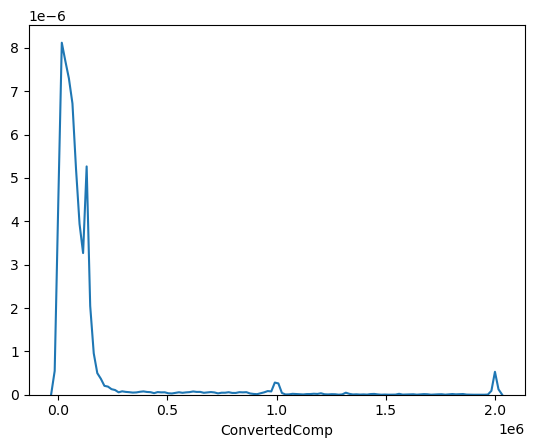

In [15]:
# your code goes here
import seaborn as sns
df_c = df['ConvertedComp']
df_new=df_c.fillna(df_c.mean())
sns.distplot(df_new, hist=False)

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:ylabel='Frequency'>

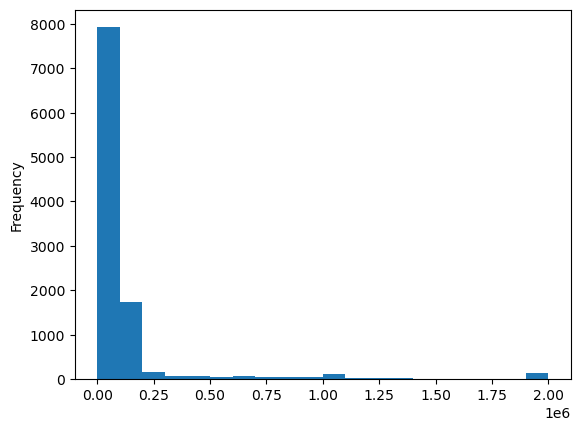

In [19]:
# your code goes here
df_c.plot(kind='hist', bins=20)

What is the median of the column `ConvertedComp`?


In [20]:
# your code goes here
df_c.median()

57745.0

How many responders identified themselves only as a **Man**?


In [31]:
# your code goes here
df['Gender'].value_counts()

Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


57708.0


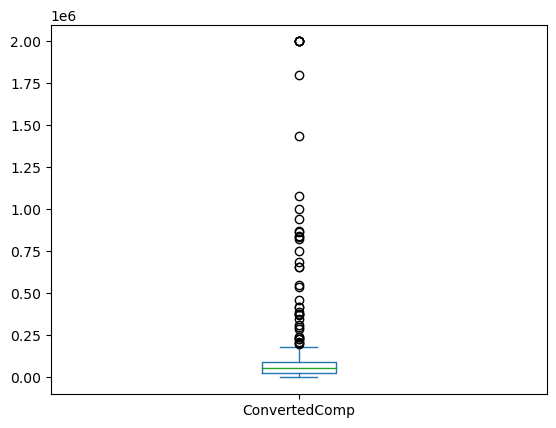

In [40]:
# your code goes here
df_wom = df[df['Gender']=='Woman']['ConvertedComp']
df_wom.plot(kind='box')
print(df_wom.median())

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [41]:
# your code goes here
df[['Age']].describe()


,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


Plot a histogram of the column `Age`.


([<matplotlib.axis.XTick at 0x7f1214294d90>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

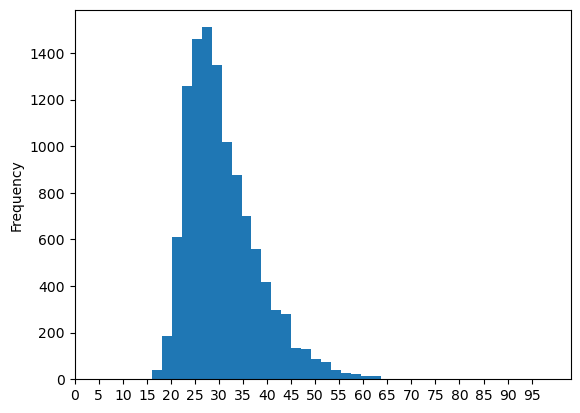

In [105]:
# your code goes here
df['Age'].plot(kind='hist', bins=40)
import matplotlib.pyplot as plt
plt.xticks(range(0, 100, 5))

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

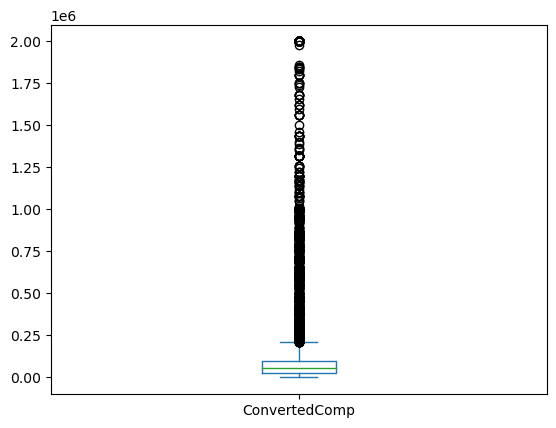

In [47]:
# your code goes here
df_c.plot(kind = 'box')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [54]:
# your code goes here
df_converted = df_c.to_frame().describe()
df_converted.reset_index()

,index,ConvertedComp
0,count,1.058200e+04
1,mean,1.315967e+05
2,std,2.947865e+05
3,min,0.000000e+00
4,25%,2.686800e+04
5,50%,5.774500e+04
6,75%,1.000000e+05
7,max,2.000000e+06


Find out the upper and lower bounds.


In [62]:
# your code goes here
IQR = df_converted.iloc[6,0]-df_converted.iloc[4,0]
upper_bound = df_converted.iloc[6,0]+1.5*IQR
lower_bound = df_converted.iloc[4,0]-1.5*IQR
print(lower_bound, upper_bound)

-82830.0 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [80]:
# your code goes here
df_c = df['ConvertedComp']
len(df_c[df_c > upper_bound])

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [108]:
# your code goes here
df_revised = df[(df['ConvertedComp']<upper_bound) & (df['ConvertedComp']>lower_bound)]
df_revised[['ConvertedComp']].describe()

,ConvertedComp
count,9703.000000
mean,59883.208389
std,43394.336755
min,0.000000
25%,24060.000000
50%,52704.000000
75%,85574.500000
max,209356.000000


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [93]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013490,0.002181,-0.015314,0.004621,0.004041
CompTotal,-0.013490,1.000000,0.001037,0.003510,0.007063,0.006970
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.015314,0.003510,0.021143,1.000000,0.026517,0.036518
CodeRevHrs,0.004621,0.007063,-0.033865,0.026517,1.000000,-0.020469
Age,0.004041,0.006970,0.105386,0.036518,-0.020469,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
